# FAKE AND REAL NEWS DETECTION USING NATURAL LANGUAGE PROCESSING (NLP)

# ![nlp](nlp.jpg)

## The objective of this work is to build a model to detect fake news using NLP techniques to handle the text.

## Natural Language Processing (NLP) uses algorithms to understand and manipulate human language. This technique is one of the most largely applied areas of machine learning. The NLP technique let handler no unstrutured data like speech or text in different formats. Since unstructured data is the majority of data worldwide and will represent over 80% of all data by the 2025. NLP use the state-of-the-art machine learning and deep learning techniques to handler no unstrurured data. With all the broad tools of NLP we can extract a lot of insights from the data. 

## Some of most common applications in NLP are the sentiment analysis, create tools to translate languages, summarize text, and even build chatbots. The areas covered range from  prediction of diseases based on electronic health records to  financial traders. 

## This notebook we let's focus on building a predictive fake news model using NPL techniques to handle the data. We can cite, for didactic purposes, an excellent article where we can learn the fundamental concepts of NLP using the Spacy library: [INTRODUCTION TO SPACY 3](http://spacy.pythonhumanities.com/intro.html).

# ![as](REN.gif)

## Every day we consume a large amount of information in different formats and from different sources. But sometimes it becomes difficult to decide which information is fake and which one is authentic. Of course, false news can't just affect our personal decisions, but also broader decisions such as financial market decisions. Developing models capable of detecting false news in the middle of full of information represents a very powerful tool. Usaremos como base de dados dois datasets, um contendo texto com as noticias verdadiras e outro com as noticias. We will use two datasets as a database, one containing text with the true news and the other with the news. The database source is at the following link [fake-and-real-news-dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

## Briefly, let's visualize the data and join the two databases in a single dataframe. We will do the removal of stopwords and lemmatization of texts. We'll get the N-grams and a word cloud of text words. To make de fake news prediction we will use two classification machine learning models. The validation metrics used of models will be the precision, accuracy, f1-score, recall and ROC-AUC. 

## 1. [Importing Necessary Libraries](#1)
## 2. [Import the Dataset](#2)
## 3. [Basic Exploratory Data Analysis](#3)
## 4. [Basic Data Cleaning](#4)
   ## *  [Removing Stopwords](#5)
   ## *  [Lemmatization](#6)
## 5. [N-gram Analysis](#7)  
   ## * [Unigram Analysis](#8)
   ## * [Bigram Analysis](#19)
   ## * [Trigram Analysis](#10)
   ## * [Word Cloud](#11)
## 6. [Build and Train the Model](#12)
   ## * [RadomForestClassifier Model](#13)
   ## * [Logistic Regression Model](#14)
## 7. [Build Pipeline](#15)
## 8. [Conclusion](#16)

<a id = "1" ></a>
# Importing Necessary Libraries

In [1]:
# importing necessary libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

<a id = "2" ></a>
# Import the Dataset


In [2]:
# Reading the datasets 'Fake' and 'True'.
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
 # Showing the first five lines of fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Showing the first five lines of true news dataset
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Adding label columns to both fake news and true news dataset
fake["label"] = 1
true["label"] = 0

In [6]:
# Showing the first five lines of fake news dataset with new feature 'label'
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
# Showing the first five lines of true news dataset with new feature 'label'
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
# Combining both the datasets into one
df = pd.concat([fake, true], ignore_index = True)
df.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


<a id = "3" ></a>
# Basic Exploratory Data Analysis

In [9]:
# Showing the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


###  We can see that no missing values infeatures

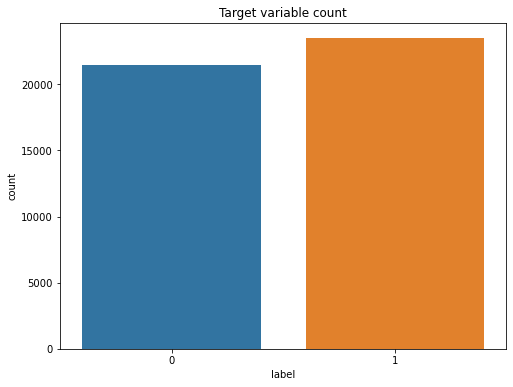

In [10]:
# Checking for imbalance data
plt.figure(figsize =(8, 6))
plt.title('Target variable count')
sns.countplot(x = 'label', data = df)
plt.show()

### How we can see above there is no class imbalance in the target variable. Both class, 0 to 'true news' and 'fake news',have almost same values.

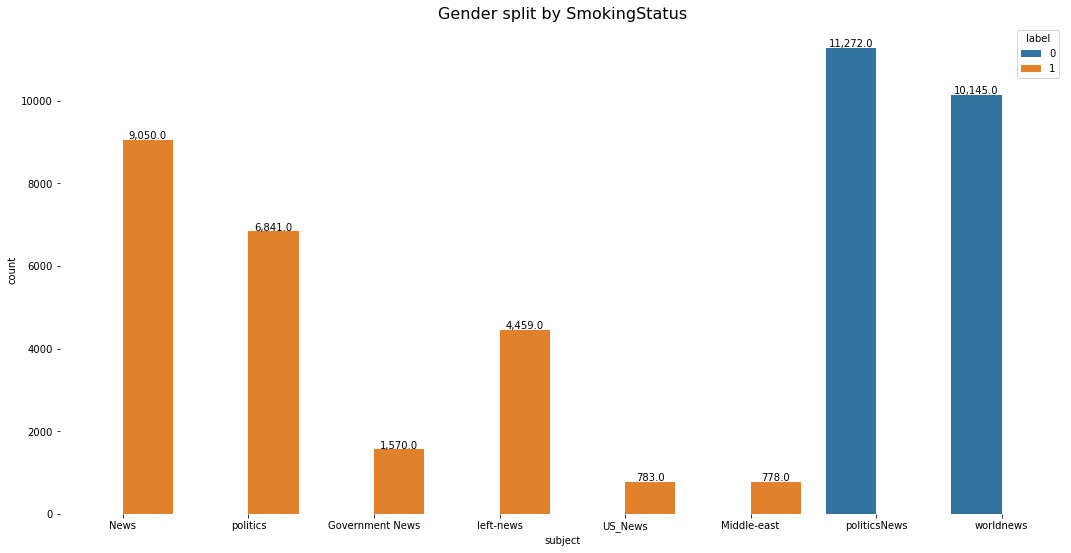

In [11]:
# Distribution of fake and real news among subjects
plt.figure(figsize=(18, 9))
a = sns.countplot(data= df, x='subject', hue='label')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by SmokingStatus', fontsize=16)
sns.despine(left=True, bottom=True);

In [12]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [13]:
# Distribution of the subject
df['subject'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='darkblue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the subject column in the unique source set')

### The three most significant text from 'subject' are 'politics News', 'world news' and 'News'.

<a id = "4" ></a>
#  Basic Data Cleaning

In [14]:
# Combining the title and text columns
df['text'] = df['title'] + " " + df['text']

del df['title']
del df['subject']
del df['date']

<a id = "5" ></a>
# Removing Stopwords

In [15]:
# We need choosing the language as english
stop = set(stopwords.words('english'))
#removing punctuation marks
punctuation = list(string.punctuation)
# Adding punctuations to the list of stop words 
stop.update(punctuation)

# Removing the square brackets
def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    text = text.lower()
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text
def clean_text(text):
    text = remove_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

# Apply function on text column
df['text']=df['text'].apply(clean_text)
df['text']

0        donald trump sends embarrassing new year’s eve...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama’s name coded website...
4        pope francis called donald trump christmas spe...
                               ...                        
44893    'fully committed' nato backs new u.s. approach...
44894    lexisnexis withdrew two products chinese marke...
44895    minsk cultural hub becomes authorities minsk (...
44896    vatican upbeat possibility pope francis visiti...
44897    indonesia buy $1.14 billion worth russian jets...
Name: text, Length: 44898, dtype: object

<a id = "6" ></a>
# Lemmatization

### Here we should make the lemmatization, where we converting a word to its base form. This process reduce the text complexity.

In [16]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# A function which takes a sentence/corpus and gets its lemmatized version.
def lemmatize_text(text):
    token_words=word_tokenize(text) 
# We need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

# Apply function on text column
df['text']=df['text'].apply(lemmatize_text)
df['text'].head()

0    donald trump sends embarrassing new year ’ s e...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama ’ s name coded websi...
4    pope francis called donald trump christmas spe...
Name: text, dtype: object

<a id = "7" ></a>
# N-gram Analysis

### Applications and considerations. n-gram models are widely used in statistical natural language processing. In speech recognition, phonemes and sequences of phonemes are modeled using a n-gram distribution. Due to the several applications of the n-gram analysis it is important to show how to deal of them . 

In [17]:
# Finding n-grams
texts = ''.join(str(df['text'].tolist()))

# First get individual words
tokenized = texts.split()

<a id = "8" ></a>
## Unigram Analysis

Text(0.5, 0, '# of Occurances')

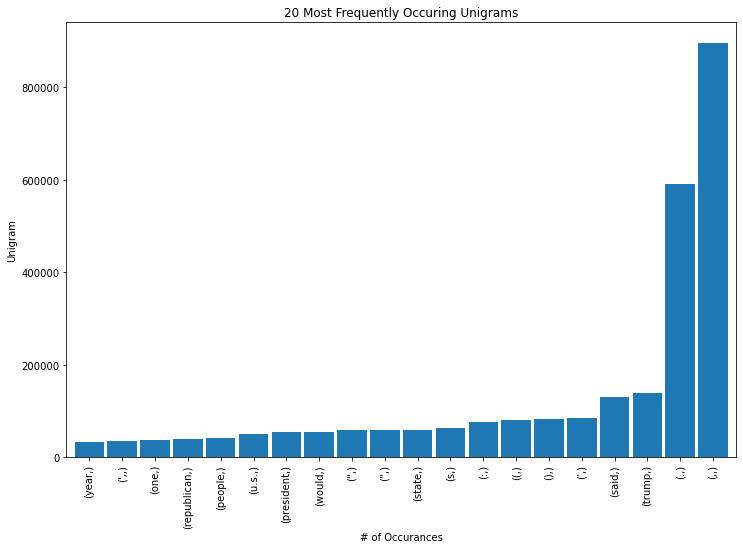

In [18]:
# Unigram plot
unigram = (pd.Series(nltk.ngrams(tokenized, 1)).value_counts())[:20]
unigram.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

<a id = "9" ></a>
## Bigram Analysis

Text(0.5, 0, '# of Occurances')

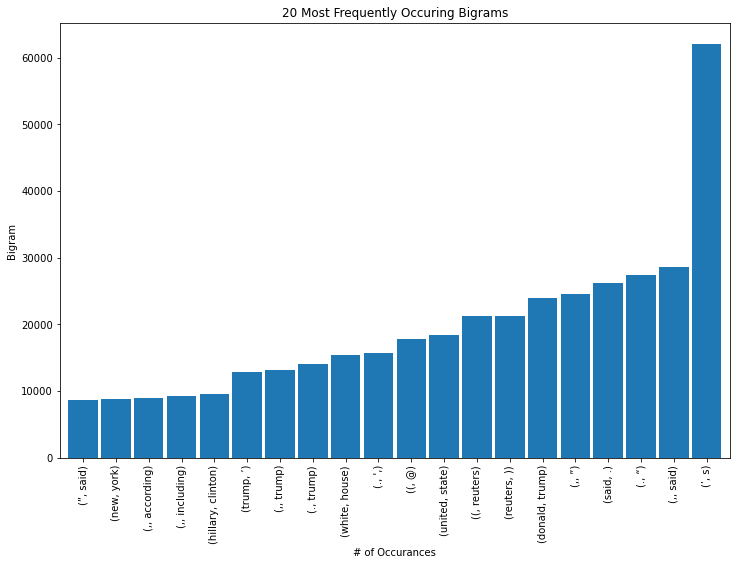

In [19]:
# Bigrams
bigram = (pd.Series(nltk.ngrams(tokenized, 2)).value_counts())[:20]
bigram.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

<a id = "10" ></a>
## Trigram Analysis

Text(0.5, 0, '# of Occurances')

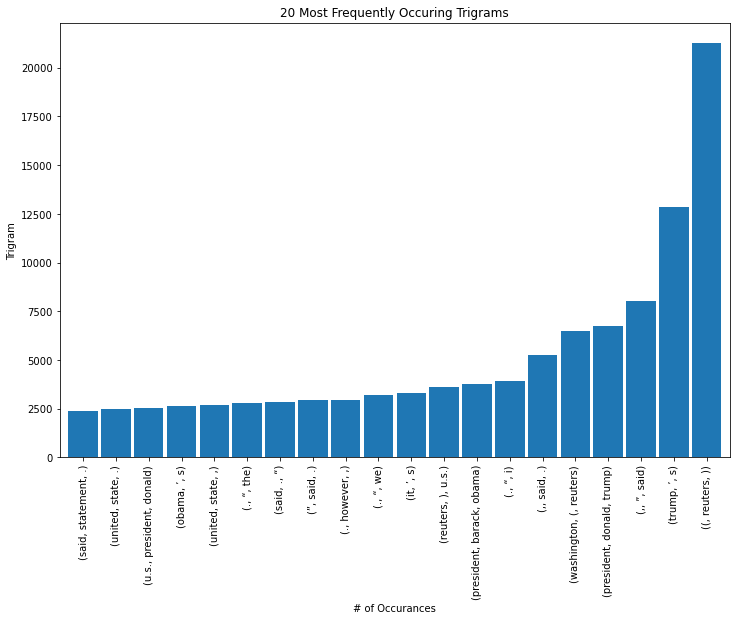

In [20]:
#trigrams
trigram = (pd.Series(nltk.ngrams(tokenized, 3)).value_counts())[:20]
trigram.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

<a id = "11" ></a>
## Word Cloud

### A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. They can  help business users compare and contrast two different pieces of text to find the wording similarities between the two, for exemple.

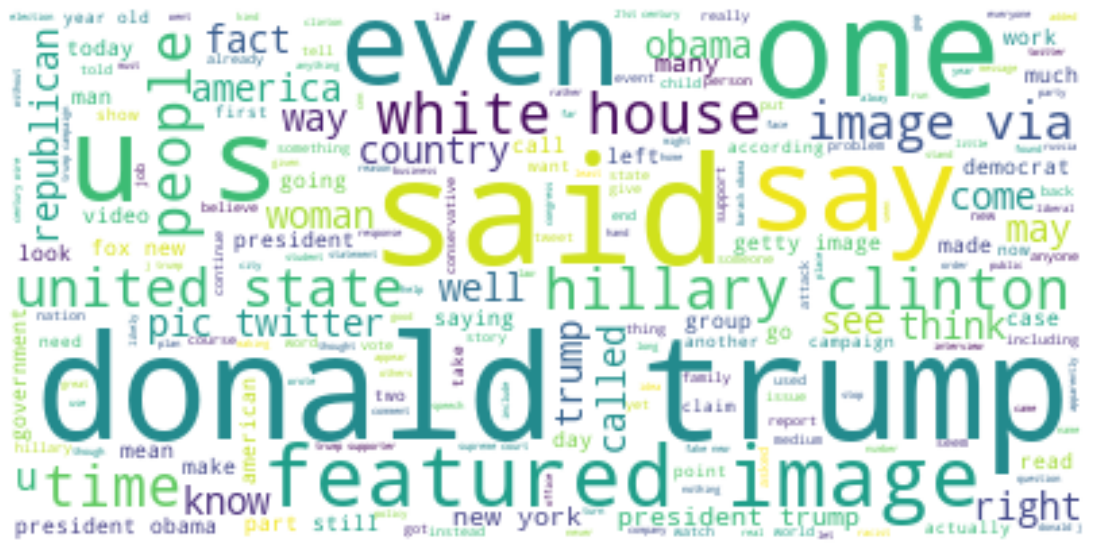

In [21]:
# Word cloud for fake news
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df[df.label == 1].text))
plt.figure(figsize=(15, 18))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
# Word cloud for true news
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df[df.label == 0].text))
plt.figure(figsize=(15, 18))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id = "12" ></a>
# Build and Train the Model

### Applying vectorize the text data. We must assign numbers to the texts of our dataset so that machine learning models can interpret.

In [ ]:
# Vectorization df['text].
# Split df dataset into feature and target parts.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

<a id = "13" ></a>
## RandomForest classifier model

### The first model that we will use will be RandomForest to classifier de text into fake news (class 1) and true news (class 0).

In [ ]:
# Split features and target in parts train and test.
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size = 0.3, random_state= 0)

In [ ]:
 # Building and Traning the RandomForestClassifier
 rfc = RandomForestClassifier()
 model = rfc.fit(X_train, y_train)

In [ ]:
# Building predict vectorized text with test dataset 'X_test'.
pred = model.predict(X_test)

## Validation metrics

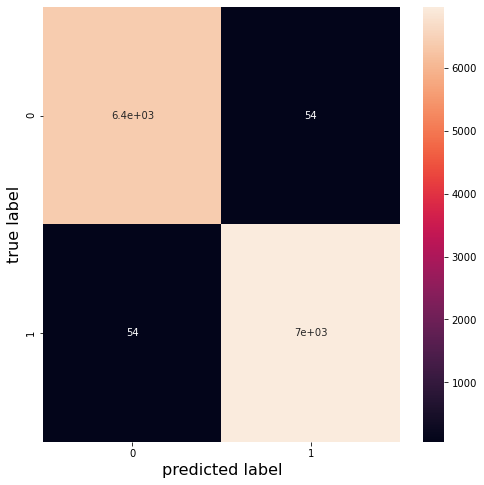

In [ ]:
# Show confusion matrix for randomforest classifier
plt.figure(figsize = (8, 8))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

In [ ]:
# Show accuracy, precision, recall and f1-score.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6445
           1       0.99      0.99      0.99      7025

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



## ROC-AUC metric

### AUC-ROC metric is a performance measurement for the classification problem, represents the degree or measure of separability. The closer AUC-ROC is to 1, the better the model's ability to distinguish between positive and negative class.


In [ ]:
 
print(f"ROC-AUC score: {roc_auc_score(y_test, pred)}")

ROC-AUC score: 0.9919672896035162


### Both accuracy, precision, recall, f1-score and roc-auc have high value. The RandomForest model presents high reliability.

<a id = "14" ></a>
## Logistic Regression model

### The logistic regression is often used to classification problem and its generally performance is good to this type task. That model have a regularization parameter we can used to avoid overfitting. Due to this, we have an idea that our model is correctly classifying classes.

In [ ]:
# Logistic Regression
def train_classifier(X, y, C=2.5, penalty='l2'):

    
    # Instantiating logistic regression
    logreg = LogisticRegression(C=C, penalty=penalty, max_iter=2000)
    # Instantiating the one against all model with logistic regression
    one_vs_rest = OneVsRestClassifier(logreg).fit(X, y)
    
    # Returning the instance of the model
    return one_vs_rest

In [ ]:
# Training logistic regression model
modelc = train_classifier(X_train, y_train)

In [ ]:
# Building predict vectorized text with test dataset 'X_test'.
preds = modelc.predict(X_test)

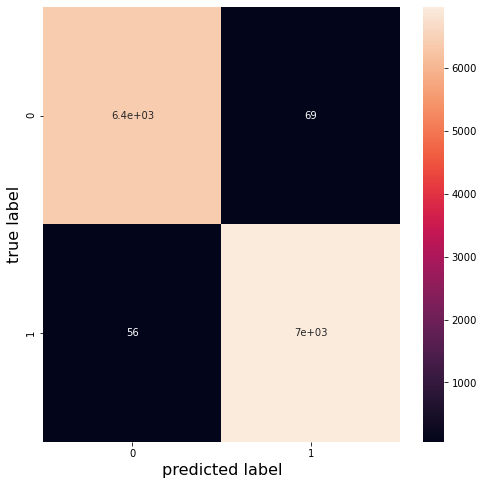

In [ ]:
# Show confusion matrix for logist regression
plt.figure(figsize = (8, 8))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

In [ ]:
 # Show accuracy, precision, recall and f1-score.
 print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6445
           1       0.99      0.99      0.99      7025

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
# Show ROC-AUC
print(f"ROC-AUC score: {roc_auc_score(y_test, preds)}")

ROC-AUC score: 0.990661248063963


<a id = "15" ></a>
# Build pipeline

### In NLP projects we often use pipelines to automate the forecast model building steps. So we built one here as an example

In [ ]:
# Split features and target in parts train and test.
news_train, news_test, text_train, text_test = train_test_split(df['text'], df['label'], test_size=0.3)

In [ ]:
# Build pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ 
    ('tfidf', TfidfVectorizer()),  
    ('classifier', RandomForestClassifier()),  
])
pipeline.fit(news_train,text_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Building predict vectorized text with test dataset 'X_test'.
prediction = pipeline.predict(news_test)

In [ ]:
 # Show accuracy, precision, recall and f1-score.
print(classification_report(prediction,text_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6443
           1       0.99      0.99      0.99      7027

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



<a id = "16" ></a>
# Conclusion

### Both the ranking models we used to detect the texts in 'fake news' and 'true news' had a high performance, as quantified by the rating metrics. The ROC-AUC showed how classes were well separated. however, we will soon investigate the possibility that there was no overffing in the learning of the model. there is no doubt that machine learning models are a powerful text classification tool when data is well handled with NLP.